In [70]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# reading data
data = pd.read_csv('dataset.csv')
print(data.shape)
data

(100, 2)


,size,price
0,53.426804,68.777596
1,61.530358,62.562382
2,47.475640,71.546632
3,59.813208,87.230925
4,55.142188,78.211518
...,...,...
95,49.239765,72.111832
96,50.039576,85.232007
97,48.149859,66.224958
98,25.128485,53.454394


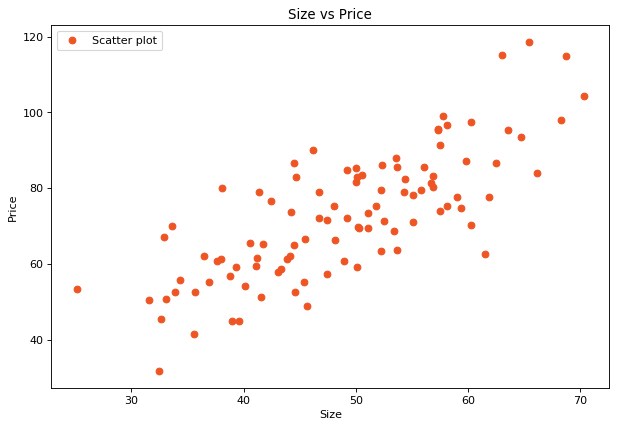

In [71]:
# collecting X and Y
X = data['size'].values
Y = data['price'].values
n = len(X)

# plot the dataset
plt.figure(figsize=(9,6),dpi=80)
plt.scatter(X,Y,c='#ef5423', label='Scatter plot')
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Size vs Price')
plt.legend()
plt.show()

In [72]:
# initiale the parameters
learning_rate = 0.0001
m = 0
c = 0
iterations = 20

In [73]:
def compute_cost( m, c, X, Y ):
    cost = 0
    # compute sum of squared errors
    for i in range(n):
        cost += ( Y[i] - ( m*X[i] + c ) )**2
    return cost/n

In [74]:
def gradient_descent( X, Y, init_m, init_c, learning_rate, iterations ):
    cost_graph = []
    m = init_m
    c = init_c
    # for every iteration, optimize m and c and compute its cost
    for i in range(iterations):
        cost_graph.append(compute_cost(m,c,X,Y))
        m, c = step_gradient(X,Y,m,c,learning_rate)
    return [m,c,cost_graph]

# step gradient function for each iteration
def step_gradient( X, Y, curr_m, curr_c, learning_rate ):
    Dm = 0
    Dc = 0
    # calculate gradient
    for i in range(n):
        Dm += ( X[i] * ( Y[i] - ( curr_m*X[i] + curr_c ) ) )
        Dc += ( Y[i] - (curr_m*X[i] + curr_c ) )
    Dm *= (-2/n)
    Dc *= (-2/n)
    updated_m = curr_m - learning_rate*Dm
    updated_c = curr_c - learning_rate*Dc
    return updated_m,updated_c

In [75]:
# debugging -> print(m,c)
m, c, cost_graph = gradient_descent(X,Y,m,c,learning_rate,iterations)


print('Optimized m : ',m)
print('Optimized c : ',c)
print('Error with optimized m and c : ',compute_cost(m,c,X,Y))

Optimized m :  1.4788956622798282
Optimized c :  0.030269517288280406
Error with optimized m and c :  112.64994425009661


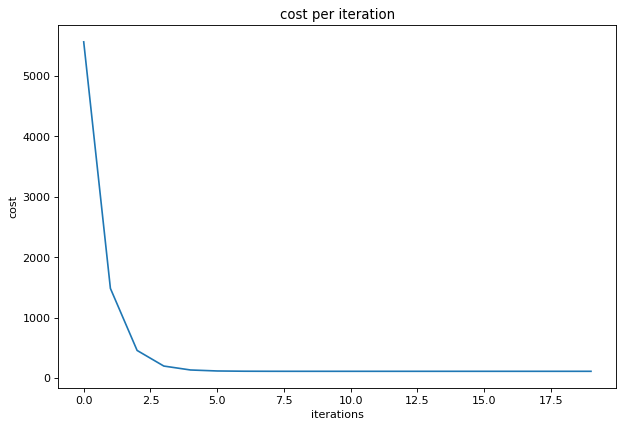

In [76]:
# plotting cost per iterations
plt.figure(figsize=(9,6),dpi=80)
plt.plot(cost_graph)
plt.xlabel('iterations')
plt.ylabel('cost')
plt.title('cost per iteration')
plt.show()

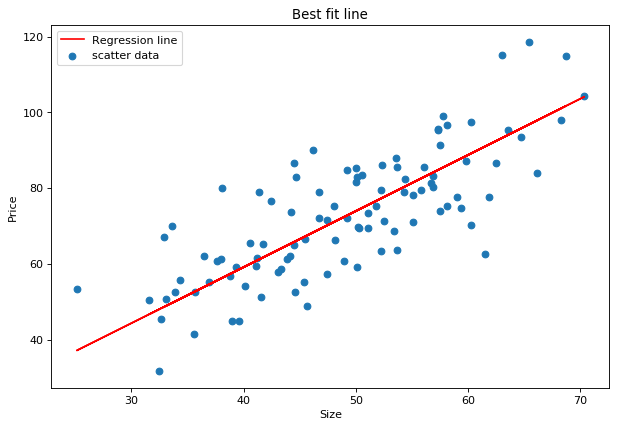

In [80]:
# plot dataset
plt.figure(figsize=(9,6),dpi=80)
plt.scatter(X,Y,label='scatter data')
# predict y values
y = m*X + c
# best fit line
plt.plot(X,y,c='r',label='Regression line')
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Best fit line')
plt.legend(loc = 'upper left')
plt.show()